<a href="https://colab.research.google.com/github/LenaVolzhina/playing-with-neural-networks/blob/master/DL_chapter_4_keras_for_initialization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Чтение и подготовка данных MNIST

In [1]:
from keras.models import Sequential
from keras.layers import Dense

from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 2s 0us/step


In [0]:
from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
X_train = x_train.reshape([-1, 28*28]) / 255.
X_test = x_test.reshape([-1, 28*28]) / 255.

# Описываем модель

In [0]:
def create_model(init):
  model = Sequential()
  model.add(Dense(100, input_shape=(28*28,), init=init, activation='tanh'))
  model.add(Dense(100, init=init, activation='tanh'))
  model.add(Dense(100, init=init, activation='tanh'))
  model.add(Dense(100, init=init, activation='tanh'))
  model.add(Dense(10, init=init, activation='softmax'))
  return model

In [0]:
uniform_model = create_model("uniform")
uniform_model.compile(
  loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy']
)
history_uniform = uniform_model.fit(
  X_train, Y_train,
  batch_size=64, nb_epoch=30, verbose=1, validation_data=(X_test, Y_test)
)

In [0]:
glorot_model = create_model("glorot_normal")
glorot_model.compile(
  loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy']
)
history_glorot = glorot_model.fit(
  X_train, Y_train,
  batch_size=64, nb_epoch=30, verbose=1, validation_data=(X_test, Y_test)
)

# Изучу метрики по эпохам

In [0]:
# history_uniform = Out[7]
# history_glorot = Out[8]

In [16]:
history_uniform.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

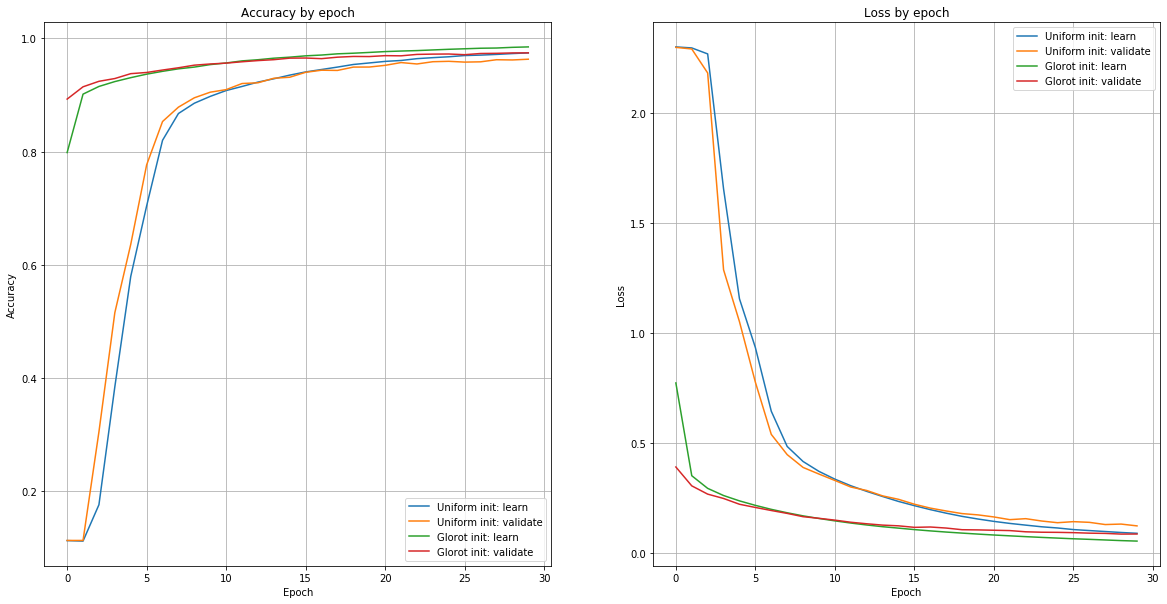

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline


xs = list(range(30))
_, axes = plt.subplots(ncols=2, figsize=(20, 10))
for value, value_name, ax in [('acc', 'Accuracy', axes[0]), ('loss', 'Loss', axes[1])]:
  for source, source_name in [(history_uniform, 'Uniform'), (history_glorot, 'Glorot')]:
    ax.plot(xs, source.history[value], label=f"{source_name} init: learn")
    ax.plot(xs, source.history['val_' + value], label=f"{source_name} init: validate")
  
  ax.set_title(value_name + ' by epoch')
  ax.set_xlabel('Epoch')
  ax.set_ylabel(value_name)
  ax.legend()
  ax.grid()

И правда работает!